# Hill's diagrammatic method

As discusssed earlier [earlier](markov_chain_tree_theorem_intro), the [Markov chain tree theorem](https://en.wikipedia.org/wiki/Markov_chain_tree_theorem) (also called Hill's diagrammatic method) provides algebraic expressions for the steady-state probabilities of a receptor model.    The function `hill_diagramatic_method()` below takes a symbolic generator matrix for such a Markov chain as input and, using the Markov chain tree theorem, calculates the steady-state probability of each state.

In [1]:
def hill_diagramatic_method(Q):
    n = Q.nrows()
    if Q.ncols() != n:
        raise ValueError
    z = [0]*n
    for i in range(n):
        a = [ j for j in range(n) ]
        a.remove(i)
        z[i] = (-1)^(n-1)*Q[a,a].determinant().simplify_full()
    return z

```{note}
The receptor models considered here have state-transition diagrams with the topology of a simple symmetric directed graph (connected, no loops). The Markov chain tree theorem always applies to receptor models with these properties.  However, there are Markov chains that can not be analyzed in this way (e.g., Markov chains with an infinite number of states).
```

## Receptor model with the topology of the cycle graph [{math}`C_3`](example_graphs:cycle_graph)

To illustrate the function `hill_diagramatic_method()`, consider a three-state receptor model that has a [cycle](example_graphs:cycle_graph).

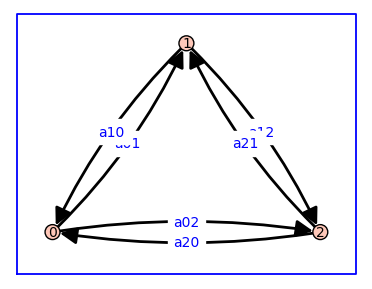

In [2]:
var('p0 p1 p2 a01 a10 a02 a20 a12 a21')
d = {0: {1:a01, 2:a02}, 1: {0:a10, 2:a12}, 2: {1:a21, 0:a20}};
G = DiGraph(d,weighted=True)
vertex_positions = {0: (0, 0), 1: (1, 1.41), 2: (2, 0)}
G.plot(figsize=4,edge_labels=True,pos=vertex_positions,graph_border=True)

Because every edge has an associated symbolic variable, we can produce the generator matrix as follows.

In [3]:
def generator(A):
    return A-diagonal_matrix(sum(A.T))

Q = generator(G.weighted_adjacency_matrix(sparse=False))
show(Q)

[-a01 - a02        a01        a02]
[       a10 -a10 - a12        a12]
[       a20        a21 -a20 - a21]

The relative probabilities according to `hill_diagramatic_method()` are:

In [4]:
z = hill_diagramatic_method(Q)
for i in range(3):
    print('z[%s] ='%i, f'{expand(z[i])}')

z[0] = a10*a20 + a12*a20 + a10*a21
z[1] = a01*a20 + a01*a21 + a02*a21
z[2] = a02*a10 + a01*a12 + a02*a12


Each relative probability, when expanded, is a multinomial with three terms, because there are three spanning trees rooted in each vertex. Each term has two factors because any spanning tree of the cycle graph {math}`C_3` has two edges.

## Receptor model with topology of the House Graph 

We conclude this section with a receptor model that has more than one cycle, namely, the [house graph](https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generators/basic.html#sage.graphs.generators.basic.HouseGraph).

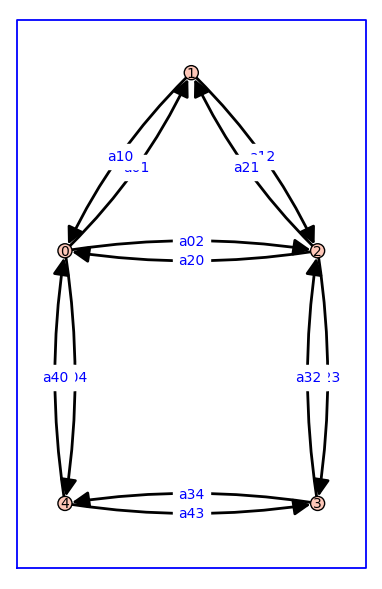

In [5]:
var('p0 p1 p2 p3 p4 a01 a10 a02 a20 a04 a40 a12 a21 a23 a32 a34 a43')
d = {0: {1:a01, 2:a02, 4:a04}, 1: {0:a10, 2:a12}, 2: {1:a21, 0:a20, 3:a23}, 3: {2:a32, 4:a34}, 4: {3:a43, 0:a40}};
G = DiGraph(d,weighted=True)
vertex_positions = {0: (0, 0), 1: (1, 1.41), 2: (2, 0), 3: (2,-2), 4: (0,-2)}
G.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)

In [6]:
Q = generator(G.weighted_adjacency_matrix(sparse=False))
show(Q)

[-a01 - a02 - a04              a01              a02                0              a04]
[             a10       -a10 - a12              a12                0                0]
[             a20              a21 -a20 - a21 - a23              a23                0]
[               0                0              a32       -a32 - a34              a34]
[             a40                0                0              a43       -a40 - a43]

In [7]:
z = hill_diagramatic_method(Q)
for i in range(5):
    print('z[%s] ='%i, f'{expand(z[i])}')

z[0] = a10*a20*a32*a40 + a12*a20*a32*a40 + a10*a21*a32*a40 + a10*a20*a34*a40 + a12*a20*a34*a40 + a10*a21*a34*a40 + a10*a23*a34*a40 + a12*a23*a34*a40 + a10*a20*a32*a43 + a12*a20*a32*a43 + a10*a21*a32*a43
z[1] = a01*a20*a32*a40 + a01*a21*a32*a40 + a02*a21*a32*a40 + a01*a20*a34*a40 + a01*a21*a34*a40 + a02*a21*a34*a40 + a01*a23*a34*a40 + a01*a20*a32*a43 + a01*a21*a32*a43 + a02*a21*a32*a43 + a04*a21*a32*a43
z[2] = a02*a10*a32*a40 + a01*a12*a32*a40 + a02*a12*a32*a40 + a02*a10*a34*a40 + a01*a12*a34*a40 + a02*a12*a34*a40 + a02*a10*a32*a43 + a04*a10*a32*a43 + a01*a12*a32*a43 + a02*a12*a32*a43 + a04*a12*a32*a43
z[3] = a02*a10*a23*a40 + a01*a12*a23*a40 + a02*a12*a23*a40 + a04*a10*a20*a43 + a04*a12*a20*a43 + a04*a10*a21*a43 + a02*a10*a23*a43 + a04*a10*a23*a43 + a01*a12*a23*a43 + a02*a12*a23*a43 + a04*a12*a23*a43
z[4] = a04*a10*a20*a32 + a04*a12*a20*a32 + a04*a10*a21*a32 + a04*a10*a20*a34 + a04*a12*a20*a34 + a04*a10*a21*a34 + a02*a10*a23*a34 + a04*a10*a23*a34 + a01*a12*a23*a34 + a02*a12*a23*a34 + a

In this case, each of the five relative probabilities is a multinomial with 10 terms because there are 10 rooted spanning trees associated to each state (vertex).  Each term has 4 factors because any spanning tree of the house graph has 4 edges.